<a href="https://colab.research.google.com/github/HJPENG27/ML/blob/main/Breast_Cancer_prediction3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**How to predict the breast cancer?** \
Here we apply machine learning algorithm to solve this problem.\
Data source: https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+(original)



### Importing the library

In [2]:
import pandas as pd

### Importing the dataset

In [3]:
from google.colab import drive
drive.mount ('/content/drive')

Mounted at /content/drive


In [4]:
dataset = pd.read_csv("/content/drive/MyDrive/MySideProject/breast_cancer_logistic_regression/data.csv")
# Explore dataset features and values 
dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
dataset.shape

(569, 33)

From the table above, we found (1) **id** feature could be ignored; (3)**diagonois** feature is classification label; (3)**Unnamed:32**, the last column, includes NaN that we dont need.

So, drop these three features.

In [ ]:
droplist = ['id','diagnosis', 'Unnamed: 32']
X = dataset.drop(droplist, axis=1)
X.head()

In [7]:
y = dataset.diagnosis

In [ ]:
# Find out whether the dataset has missing value
dataset.isnull().sum()

Lucikly, the other features has no null values.

In [9]:
# check X desriptive statistics
X.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


### Data Visualization



Explore the data now

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


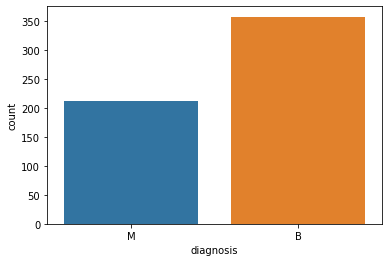

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
# let's get the frequency of cancer stage
# y = dataset.diagnosis
sns.countplot(y)

Show the data distribution:
- **Violin plot**: It is similar to a box plot. While a box plot only shows summary statistics such as mean/median and interquartile ranges, the violin plot shows the full distribution of the data.   
- **Swarm plot**: Draw a categorical scatterplot with 
non-overlapping points.

Before violin and swarm plot we need to **normalization or standirdization**. Because differences between values of features are very high to observe on plot. I plot features in 3 group and each group includes 10 features to observe better.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

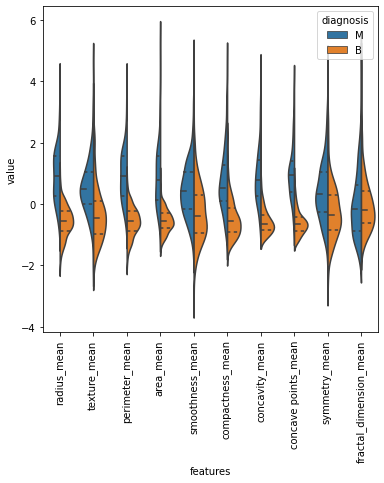

In [28]:
# first ten features
data_dia = y
data = X

# standardization
data_n_2 = (data - data.mean()) / (data.std())              
data = pd.concat([y,data_n_2.iloc[:,0:10]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(6,6))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data,split=True, inner="quart")
plt.xticks(rotation=90)

Lets interpret the plot above together. For example, in **texture_mean** feature, median of the Malignant and Benign looks like separated so it can be good for classification. However, in **fractal_dimension_mean** feature, median of the Malignant and Benign does not looks like separated so it does not gives good information for classification.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

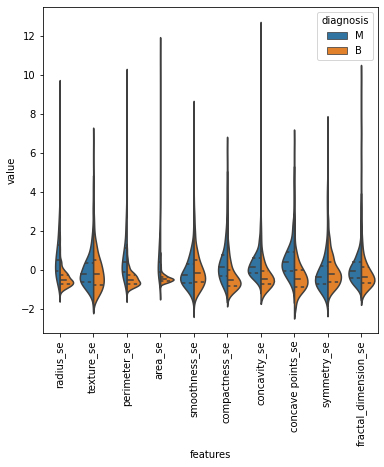

In [35]:
# Second ten features
data = pd.concat([y,data_n_2.iloc[:,10:20]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(6,6))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data,split=True, inner="quart")
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

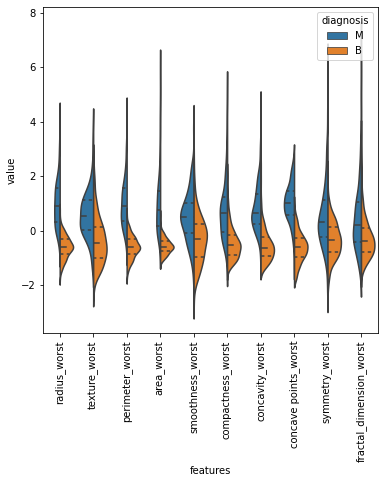

In [36]:
# Third ten features
data = pd.concat([y,data_n_2.iloc[:,20:]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(6,6))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data,split=True, inner="quart")
plt.xticks(rotation=90)

From the plot above, variable of **concavity_worst** and **concave point_wors**t looks like similar but how can we decide whether they are correlated with each other or not. (Not always true but, basically if the features are correlated with each other we can drop one of them)

In order to compare two features deeper, lets use joint plot. Look at this in joint plot below, it is really correlated. Pearsonr value is correlation value and 1 is the highest. Therefore, 0.86 is looks enough to say that they are correlated. Do not forget, we are not choosing features yet, we are just looking to have an idea about them.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


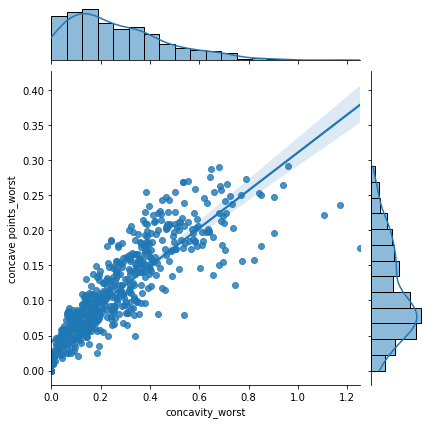

In [34]:
sns.jointplot(X.loc[:,'concavity_worst'], X.loc[:,'concave points_worst'], kind="reg")

What about three or more feauture comparision ? For this purpose we can use pair grid plot. And we discover one more thing **radius_worst, perimeter_worst and area_worst** are correlated as it can be seen pair grid plot. We definetely use these discoveries for feature selection.

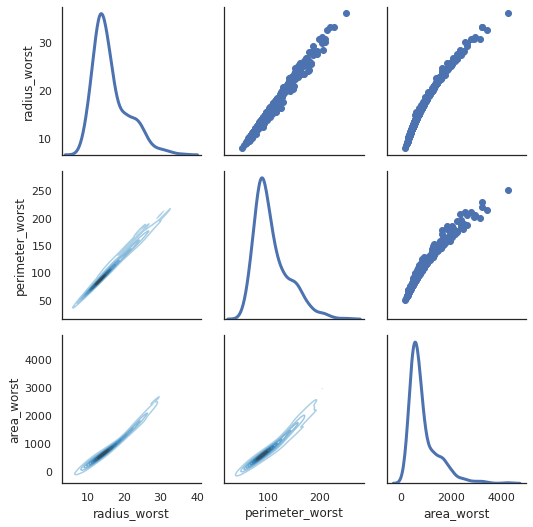

In [39]:
sns.set(style="white")
df = X.loc[:,['radius_worst','perimeter_worst','area_worst']]
g = sns.PairGrid(df, diag_sharey=False)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot, lw=3)

Swarm plot: lets see more discovery.

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 41.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 41.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 41.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 46.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 39.7% of the points cannot be placed; y

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

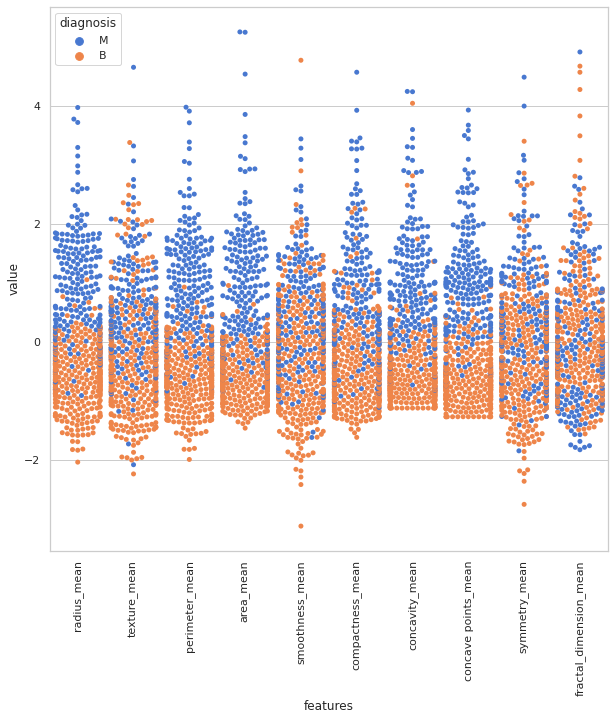

In [46]:
sns.set(style="whitegrid", palette="muted")
data_dia = y
data = X
data_n_2 = (data - data.mean()) / (data.std())              # standardization
data = pd.concat([y,data_n_2.iloc[:,0:10]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
import time
tic = time.time()
sns.swarmplot(x="features", y="value", hue="diagnosis", data=data)

plt.xticks(rotation=90)

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 65.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 61.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 66.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 71.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 62.6% of the points cannot be placed; y

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

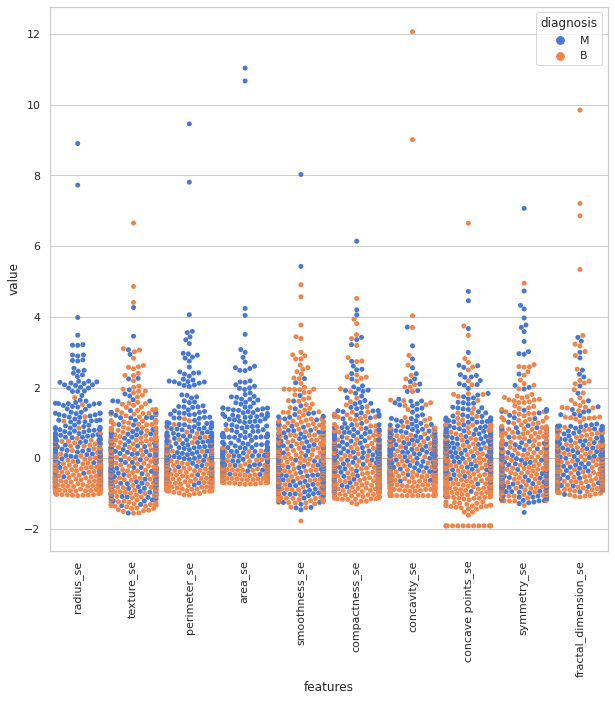

In [42]:
# feature_se
data = pd.concat([y,data_n_2.iloc[:,10:20]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.swarmplot(x="features", y="value", hue="diagnosis", data=data)
plt.xticks(rotation=90)

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 47.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 45.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 48.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 54.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 43.9% of the points cannot be placed; y

swarm plot time:  20.722970008850098  s


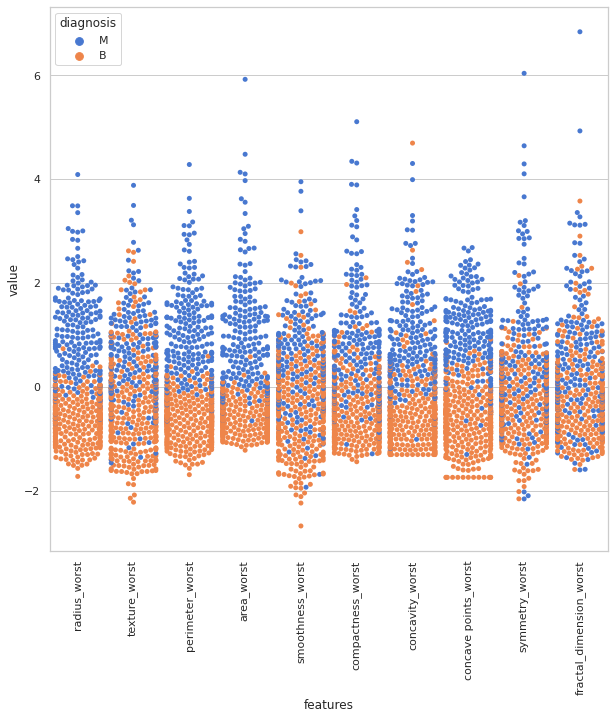

In [47]:
# feature_worst
data = pd.concat([y,data_n_2.iloc[:,20:]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.swarmplot(x="features", y="value", hue="diagnosis", data=data)
toc = time.time()
plt.xticks(rotation=90)
print("swarm plot time: ", toc-tic ," s")

**area_worst** in last swarm plot looks like malignant and benign are seprated not totaly but mostly. Hovewer, smoothness_se in swarm plot 2 looks like malignant and benign are mixed so it is hard to classfy while using this feature.

**What if we want to observe all correlation between features?** 

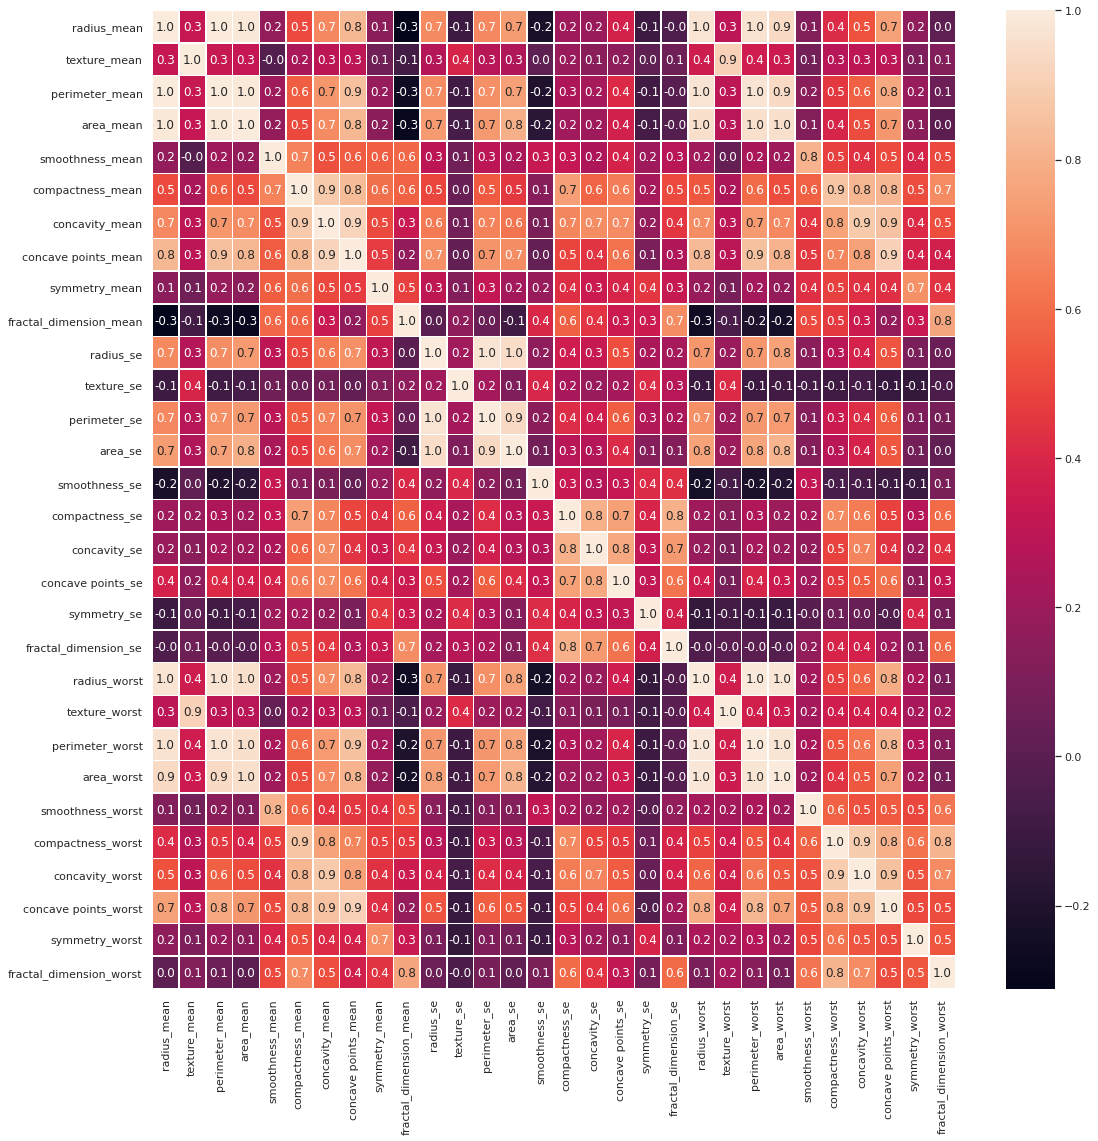

In [49]:
# correlation heatmap
# sns.heatmap(X.corr())
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(X.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

### Feature Selection

In this part we will select feature with different methods that are feature selection with **correlation, univariate feature selection, recursive feature elimination (RFE), recursive feature elimination with cross validation (RFECV)** and tree based feature selection. We will use random forest classification in order to train our model and predict.

- As it can be seen in map heat figure radius_mean, perimeter_mean and area_mean are correlated with each other so we will use only **area_mean**.
- Compactness_mean, concavity_mean and concave points_mean are correlated with each other.Therefore I only choose **concavity_mean**.
-  radius_se, perimeter_se and area_se are correlated and I only use **area_se**. 
- radius_worst, perimeter_worst and area_worst are correlated so I use **area_worst**. 
- Compactness_worst, concavity_worst and concave points_worst so I use **concavity_worst**. 
- Compactness_se, concavity_se and concave points_se so I use **concavity_se**. 
- texture_mean and texture_worst are correlated and I use **texture_mean**. 
- area_worst and area_mean are correlated, I use **area_mean**.


In [50]:
drop_list1 = ['perimeter_mean','radius_mean','compactness_mean','concave points_mean','radius_se','perimeter_se','radius_worst','perimeter_worst','compactness_worst','concave points_worst','compactness_se','concave points_se','texture_worst','area_worst']
 # do not modify x, we will use it later 
X_1 = X.drop(drop_list1,axis = 1 )       
X_1.head()

,texture_mean,area_mean,smoothness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,smoothness_se,concavity_se,symmetry_se,fractal_dimension_se,smoothness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
0,10.38,1001.0,0.11840,0.3001,0.2419,0.07871,0.9053,153.40,0.006399,0.05373,0.03003,0.006193,0.1622,0.7119,0.4601,0.11890
1,17.77,1326.0,0.08474,0.0869,0.1812,0.05667,0.7339,74.08,0.005225,0.01860,0.01389,0.003532,0.1238,0.2416,0.2750,0.08902
2,21.25,1203.0,0.10960,0.1974,0.2069,0.05999,0.7869,94.03,0.006150,0.03832,0.02250,0.004571,0.1444,0.4504,0.3613,0.08758
3,20.38,386.1,0.14250,0.2414,0.2597,0.09744,1.1560,27.23,0.009110,0.05661,0.05963,0.009208,0.2098,0.6869,0.6638,0.17300
4,14.34,1297.0,0.10030,0.1980,0.1809,0.05883,0.7813,94.44,0.011490,0.05688,0.01756,0.005115,0.1374,0.4000,0.2364,0.07678


After drop correlated features, as it can be seen in below correlation matrix, there are no more correlated features. Actually, I know and you see there is correlation value 0.9 but lets see together what happen if we do not drop it.

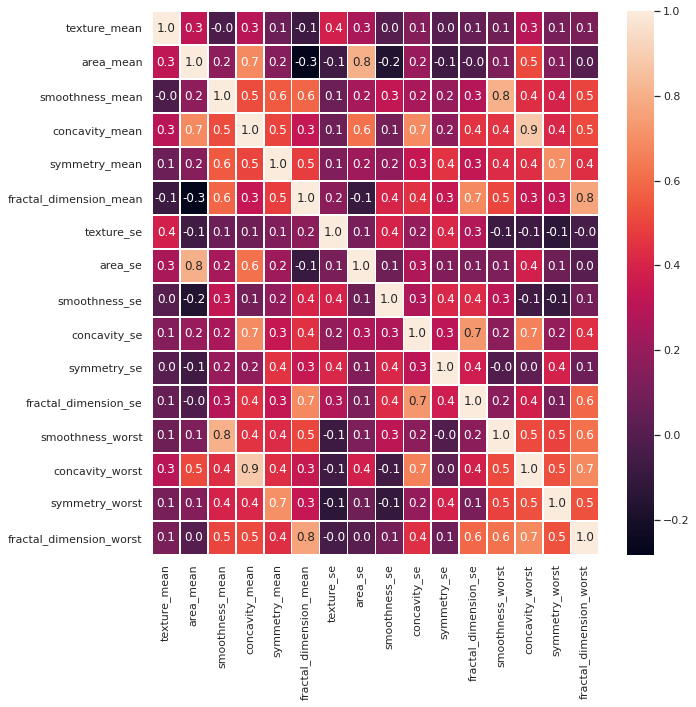

In [53]:
#correlation map
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(X_1.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

Well, we choose our features but did we choose correctly ? Lets use the following models to find accuracy. 

### Splitting the dataset into Training set and Test set

In [54]:
# Split the dataset: scikit-learn library!
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### 1. Training the models (Logistics, SVM, KNN, Random Forest) 
### 2. Predict the model
### 3. Estimate the Accuracy


In [55]:
import sklearn.metrics as metrics

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier


In [56]:
# Logistic Regression
model = LogisticRegression(random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
acc_lr = metrics.accuracy_score(y_pred, y_test)
acc_lr.round(3)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.947

In [57]:
# SVM
model = SVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
acc_svc = metrics.accuracy_score(y_pred, y_test)
acc_svc.round(3)

0.93

In [58]:
# KNN
model = KNeighborsClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
acc_knn = metrics.accuracy_score(y_pred, y_test)
acc_knn.round(3)

0.939

In [59]:
# Random Forest 
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
acc_rfc = metrics.accuracy_score(y_pred, y_test)
acc_rfc.round(3)

0.965

### Computing the accuracy with k-Fold Cross Validation

In [60]:
from sklearn.model_selection import cross_val_score

In [61]:
# Choose KNN for cross validation
cv_rfc = cross_val_score(KNeighborsClassifier(), X, y, cv=5)
print("KNN Accuracy:{:.2f}%".format(cv_rfc.mean()*100))
print("Standar Deviation:{:.2f}%".format(cv_rfc.std()*100))

KNN Accuracy:92.79%
Standar Deviation:2.18%


In [62]:
# Choose Random Forest for cross validation
cv_rfc = cross_val_score(RandomForestClassifier(), X, y, cv=5)
print("Random Forest Accuracy:{:.2f}%".format(cv_rfc.mean()*100))
print("Standar Deviation:{:.2f}%".format(cv_rfc.std()*100))

Random Forest Accuracy:95.96%
Standar Deviation:1.89%
